In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Novo Dataset

In [7]:
df = pd.read_csv('student-data.csv')  
df['passed'] = df['passed'].map({'yes': 1, 'no': 0})
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['sex'] = df['sex'].map({'F': 1, 'M': 0})
df['address'] = df['address'].map({'R': 1, 'U': 0})
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['Mjob', 'Fjob'], drop_first=True)
df = pd.get_dummies(df, columns=['reason'], drop_first=True)
df = pd.get_dummies(df, columns=['guardian'], drop_first=True)
df = df.replace({True: 1, False: 0})
df


C:\Users\Francisco Machado\AppData\Local\Temp\ipykernel_6796\617921335.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,1,18,0,1,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,1,1,17,0,1,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,1,1,15,0,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,1,1,15,0,1,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,1,1,16,0,1,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,0,0,0,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,0,0,17,0,0,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
392,0,0,21,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
393,0,0,18,1,0,1,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0



=== TOP 15 VARIÁVEIS MAIS CORRELACIONADAS COM 'PASSED' ===

Correlação de Pearson:
      Variável   Pearson
      failures -0.337731
         goout -0.183399
           age -0.179645
        higher  0.157708
          Medu  0.115396
          Fedu  0.108057
guardian_other -0.107977
     schoolsup -0.099860
      romantic -0.097737
          paid  0.092665
      absences -0.092244
   Mjob_health  0.080484
     studytime  0.074613
    Mjob_other -0.074163
           sex -0.070618

Correlação de Spearman:
      Variável  Spearman
      failures -0.338158
         goout -0.186965
           age -0.168240
        higher  0.157708
          Medu  0.117503
          Fedu  0.109801
guardian_other -0.107977
     schoolsup -0.099860
      romantic -0.097737
          paid  0.092665
          Dalc -0.085570
   Mjob_health  0.080484
    Mjob_other -0.074163
     studytime  0.072446
           sex -0.070618

=== TOP 15 VARIÁVEIS MENOS CORRELACIONADAS COM 'PASSED' ===

Correlação de Pearson (menor 

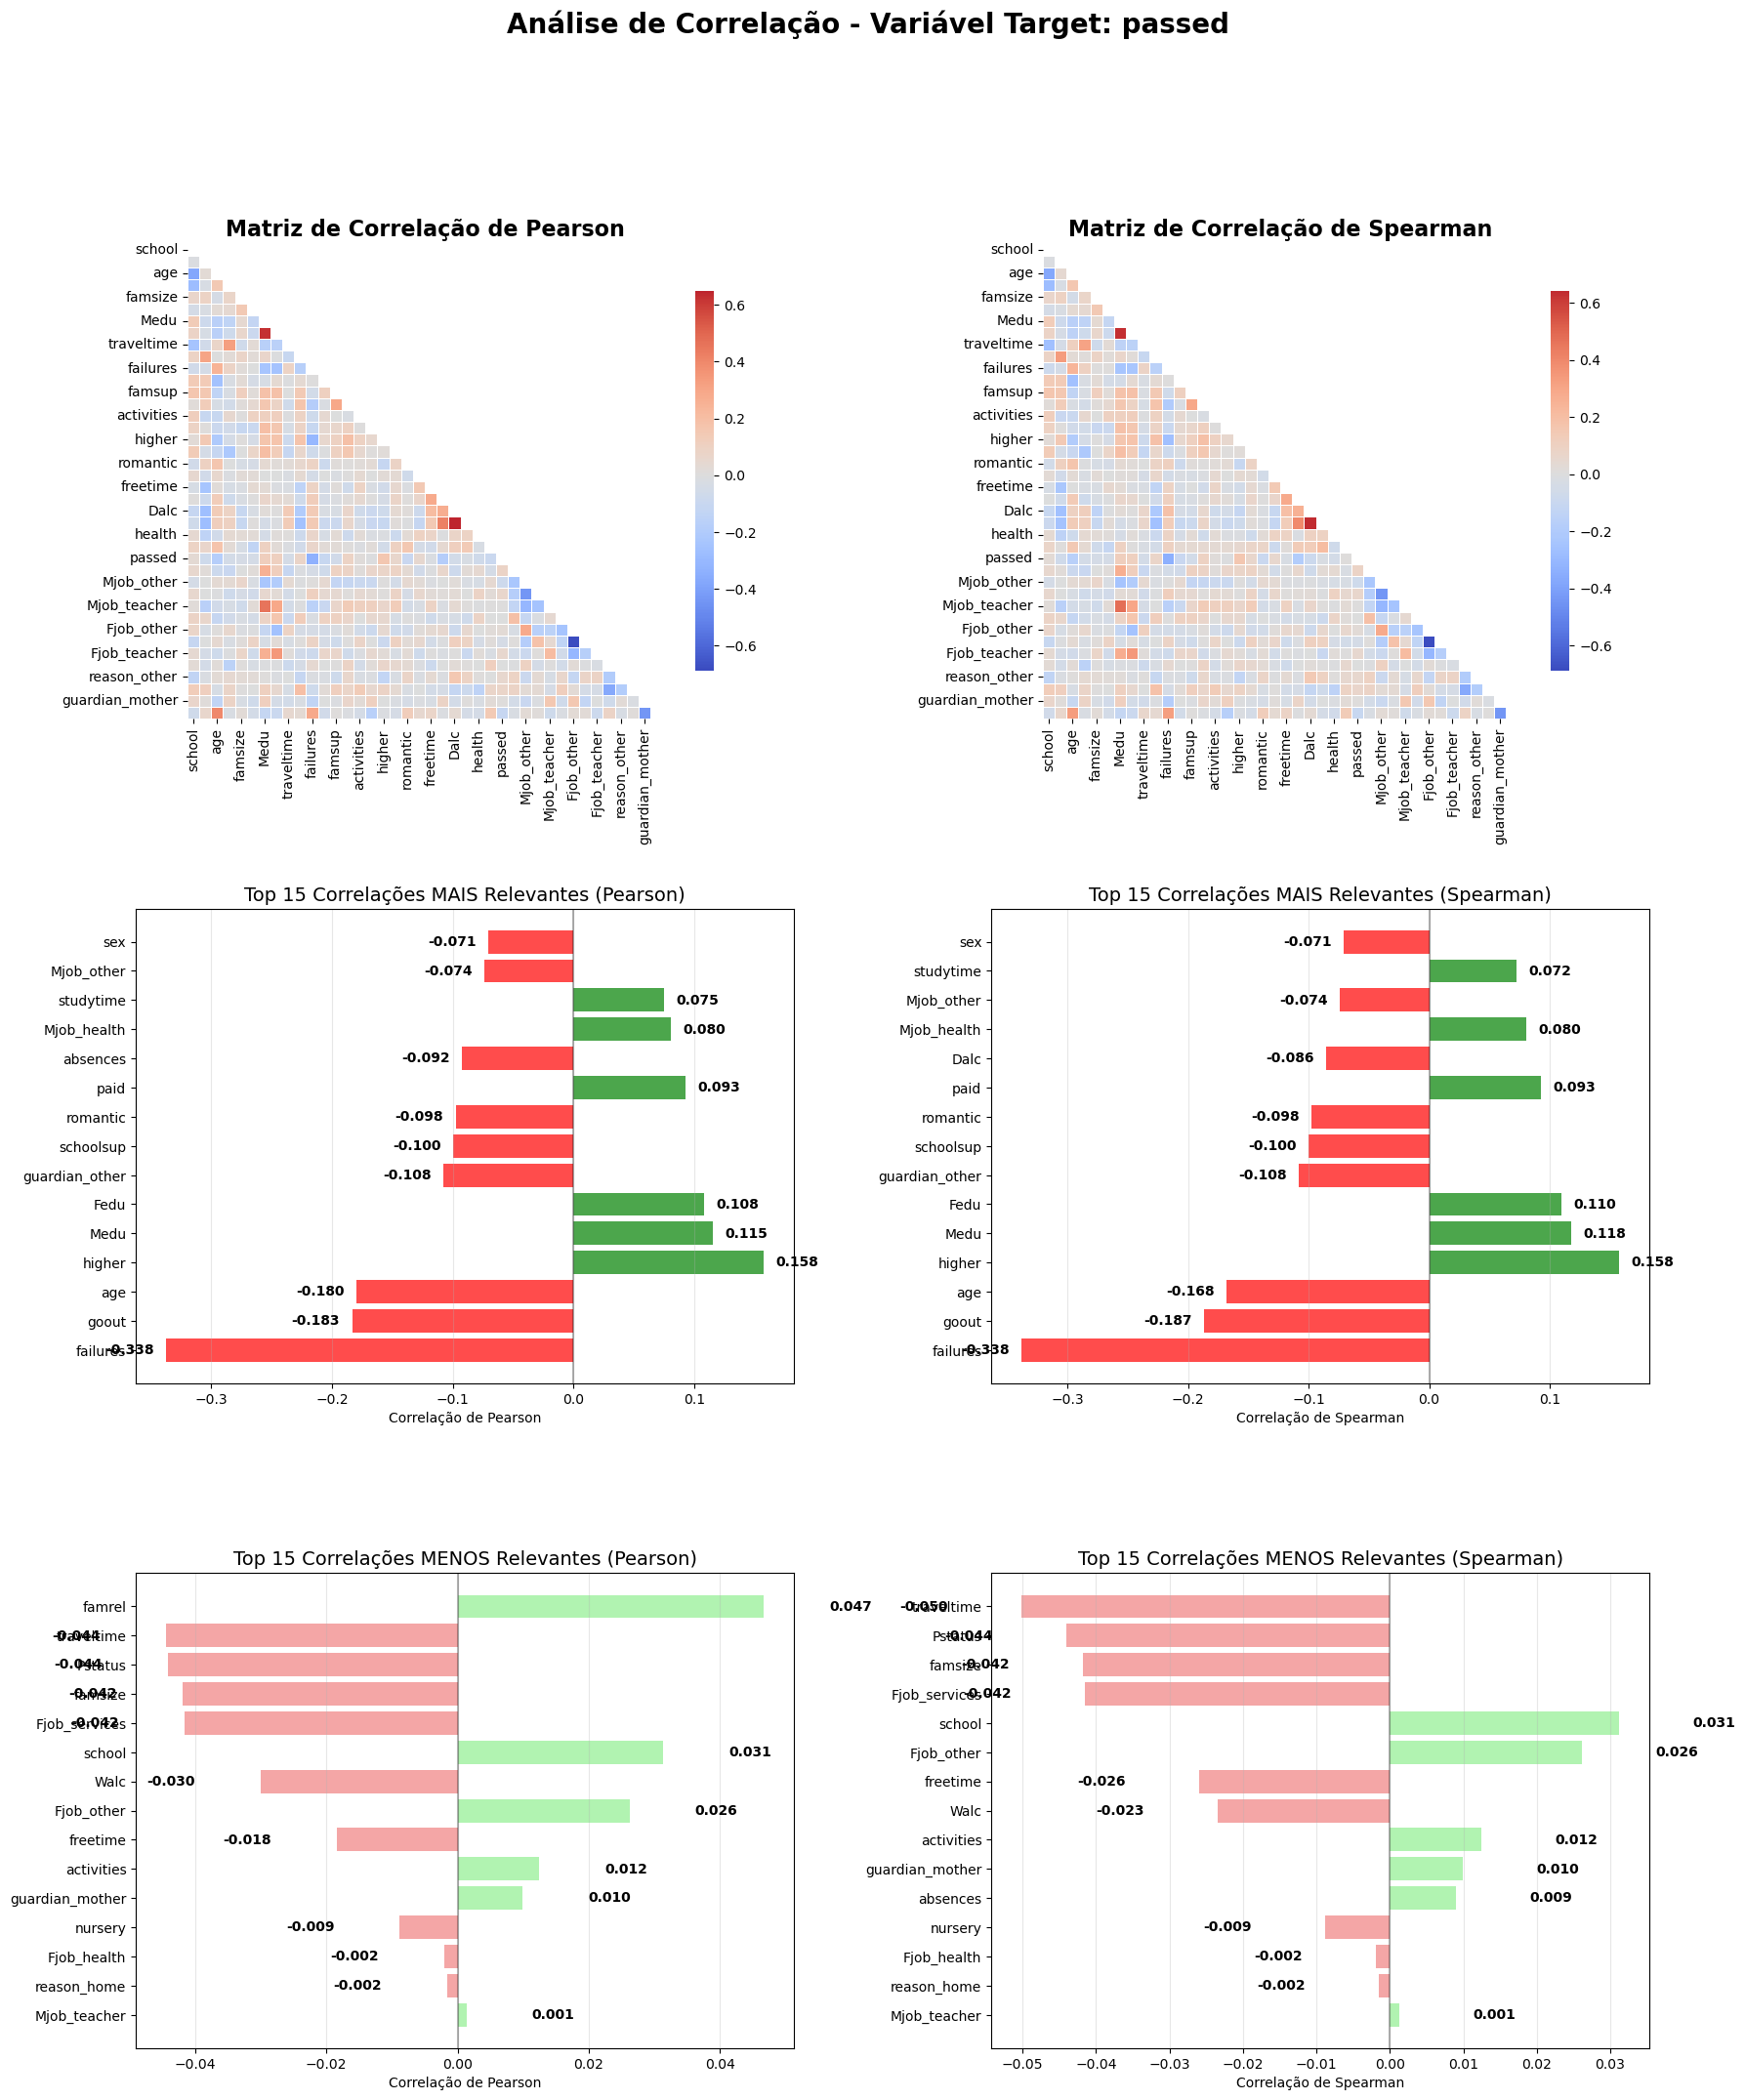

In [8]:
# Calcular matrizes de correlação
correlation_pearson = df.corr(method='pearson')
correlation_spearman = df.corr(method='spearman')

# Extrair correlações com a variável target 'passed'
target_col = 'passed'
correlations_with_target = pd.DataFrame({
    'Variável': correlation_pearson.index,
    'Pearson': correlation_pearson[target_col],
    'Spearman': correlation_spearman[target_col],
    'Pearson_Abs': correlation_pearson[target_col].abs(),
    'Spearman_Abs': correlation_spearman[target_col].abs()
})

# Remover a própria variável target
correlations_with_target = correlations_with_target[correlations_with_target['Variável'] != target_col]

# Ordenar por correlação absoluta
top_pearson = correlations_with_target.sort_values('Pearson_Abs', ascending=False).head(15)
top_spearman = correlations_with_target.sort_values('Spearman_Abs', ascending=False).head(15)

# Obter as 15 variáveis menos relevantes (menor correlação absoluta)
bottom_pearson = correlations_with_target.sort_values('Pearson_Abs').head(15)
bottom_spearman = correlations_with_target.sort_values('Spearman_Abs').head(15)

# Exibir top correlações
print("\n=== TOP 15 VARIÁVEIS MAIS CORRELACIONADAS COM 'PASSED' ===")
print("\nCorrelação de Pearson:")
print(top_pearson[['Variável', 'Pearson']].to_string(index=False))

print("\nCorrelação de Spearman:")
print(top_spearman[['Variável', 'Spearman']].to_string(index=False))

# Exibir correlações menos relevantes
print("\n=== TOP 15 VARIÁVEIS MENOS CORRELACIONADAS COM 'PASSED' ===")
print("\nCorrelação de Pearson (menor valor absoluto):")
print(bottom_pearson[['Variável', 'Pearson']].to_string(index=False))

print("\nCorrelação de Spearman (menor valor absoluto):")
print(bottom_spearman[['Variável', 'Spearman']].to_string(index=False))

# Criar visualizações
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Matriz de correlação de Pearson (heatmap)
mask = np.triu(np.ones_like(correlation_pearson, dtype=bool))
sns.heatmap(correlation_pearson, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[0, 0])
axes[0, 0].set_title('Matriz de Correlação de Pearson', fontsize=16, fontweight='bold')

# 2. Matriz de correlação de Spearman (heatmap)
sns.heatmap(correlation_spearman, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[0, 1])
axes[0, 1].set_title('Matriz de Correlação de Spearman', fontsize=16, fontweight='bold')

# 3. Top correlações com 'passed' (Pearson)
colors_p = ['green' if x > 0 else 'red' for x in top_pearson['Pearson']]
axes[1, 0].barh(range(len(top_pearson)), top_pearson['Pearson'], color=colors_p, alpha=0.7)
axes[1, 0].set_yticks(range(len(top_pearson)))
axes[1, 0].set_yticklabels(top_pearson['Variável'])
axes[1, 0].set_xlabel('Correlação de Pearson')
axes[1, 0].set_title('Top 15 Correlações MAIS Relevantes (Pearson)', fontsize=14)
axes[1, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(top_pearson['Pearson']):
    axes[1, 0].text(v + (0.01 if v > 0 else -0.01), i, f"{v:.3f}", 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold')

# 4. Top correlações com 'passed' (Spearman)
colors_s = ['green' if x > 0 else 'red' for x in top_spearman['Spearman']]
axes[1, 1].barh(range(len(top_spearman)), top_spearman['Spearman'], color=colors_s, alpha=0.7)
axes[1, 1].set_yticks(range(len(top_spearman)))
axes[1, 1].set_yticklabels(top_spearman['Variável'])
axes[1, 1].set_xlabel('Correlação de Spearman')
axes[1, 1].set_title('Top 15 Correlações MAIS Relevantes (Spearman)', fontsize=14)
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(top_spearman['Spearman']):
    axes[1, 1].text(v + (0.01 if v > 0 else -0.01), i, f"{v:.3f}", 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold')

# 5. Correlações menos relevantes com 'passed' (Pearson)
colors_bp = ['lightgreen' if x > 0 else 'lightcoral' for x in bottom_pearson['Pearson']]
axes[2, 0].barh(range(len(bottom_pearson)), bottom_pearson['Pearson'], color=colors_bp, alpha=0.7)
axes[2, 0].set_yticks(range(len(bottom_pearson)))
axes[2, 0].set_yticklabels(bottom_pearson['Variável'])
axes[2, 0].set_xlabel('Correlação de Pearson')
axes[2, 0].set_title('Top 15 Correlações MENOS Relevantes (Pearson)', fontsize=14)
axes[2, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[2, 0].grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(bottom_pearson['Pearson']):
    axes[2, 0].text(v + (0.01 if v > 0 else -0.01), i, f"{v:.3f}", 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold')

# 6. Correlações menos relevantes com 'passed' (Spearman)
colors_bs = ['lightgreen' if x > 0 else 'lightcoral' for x in bottom_spearman['Spearman']]
axes[2, 1].barh(range(len(bottom_spearman)), bottom_spearman['Spearman'], color=colors_bs, alpha=0.7)
axes[2, 1].set_yticks(range(len(bottom_spearman)))
axes[2, 1].set_yticklabels(bottom_spearman['Variável'])
axes[2, 1].set_xlabel('Correlação de Spearman')
axes[2, 1].set_title('Top 15 Correlações MENOS Relevantes (Spearman)', fontsize=14)
axes[2, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[2, 1].grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(bottom_spearman['Spearman']):
    axes[2, 1].text(v + (0.01 if v > 0 else -0.01), i, f"{v:.3f}", 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.suptitle('Análise de Correlação - Variável Target: passed', fontsize=20, fontweight='bold')
plt.show()

## Nova Correlation Matrix

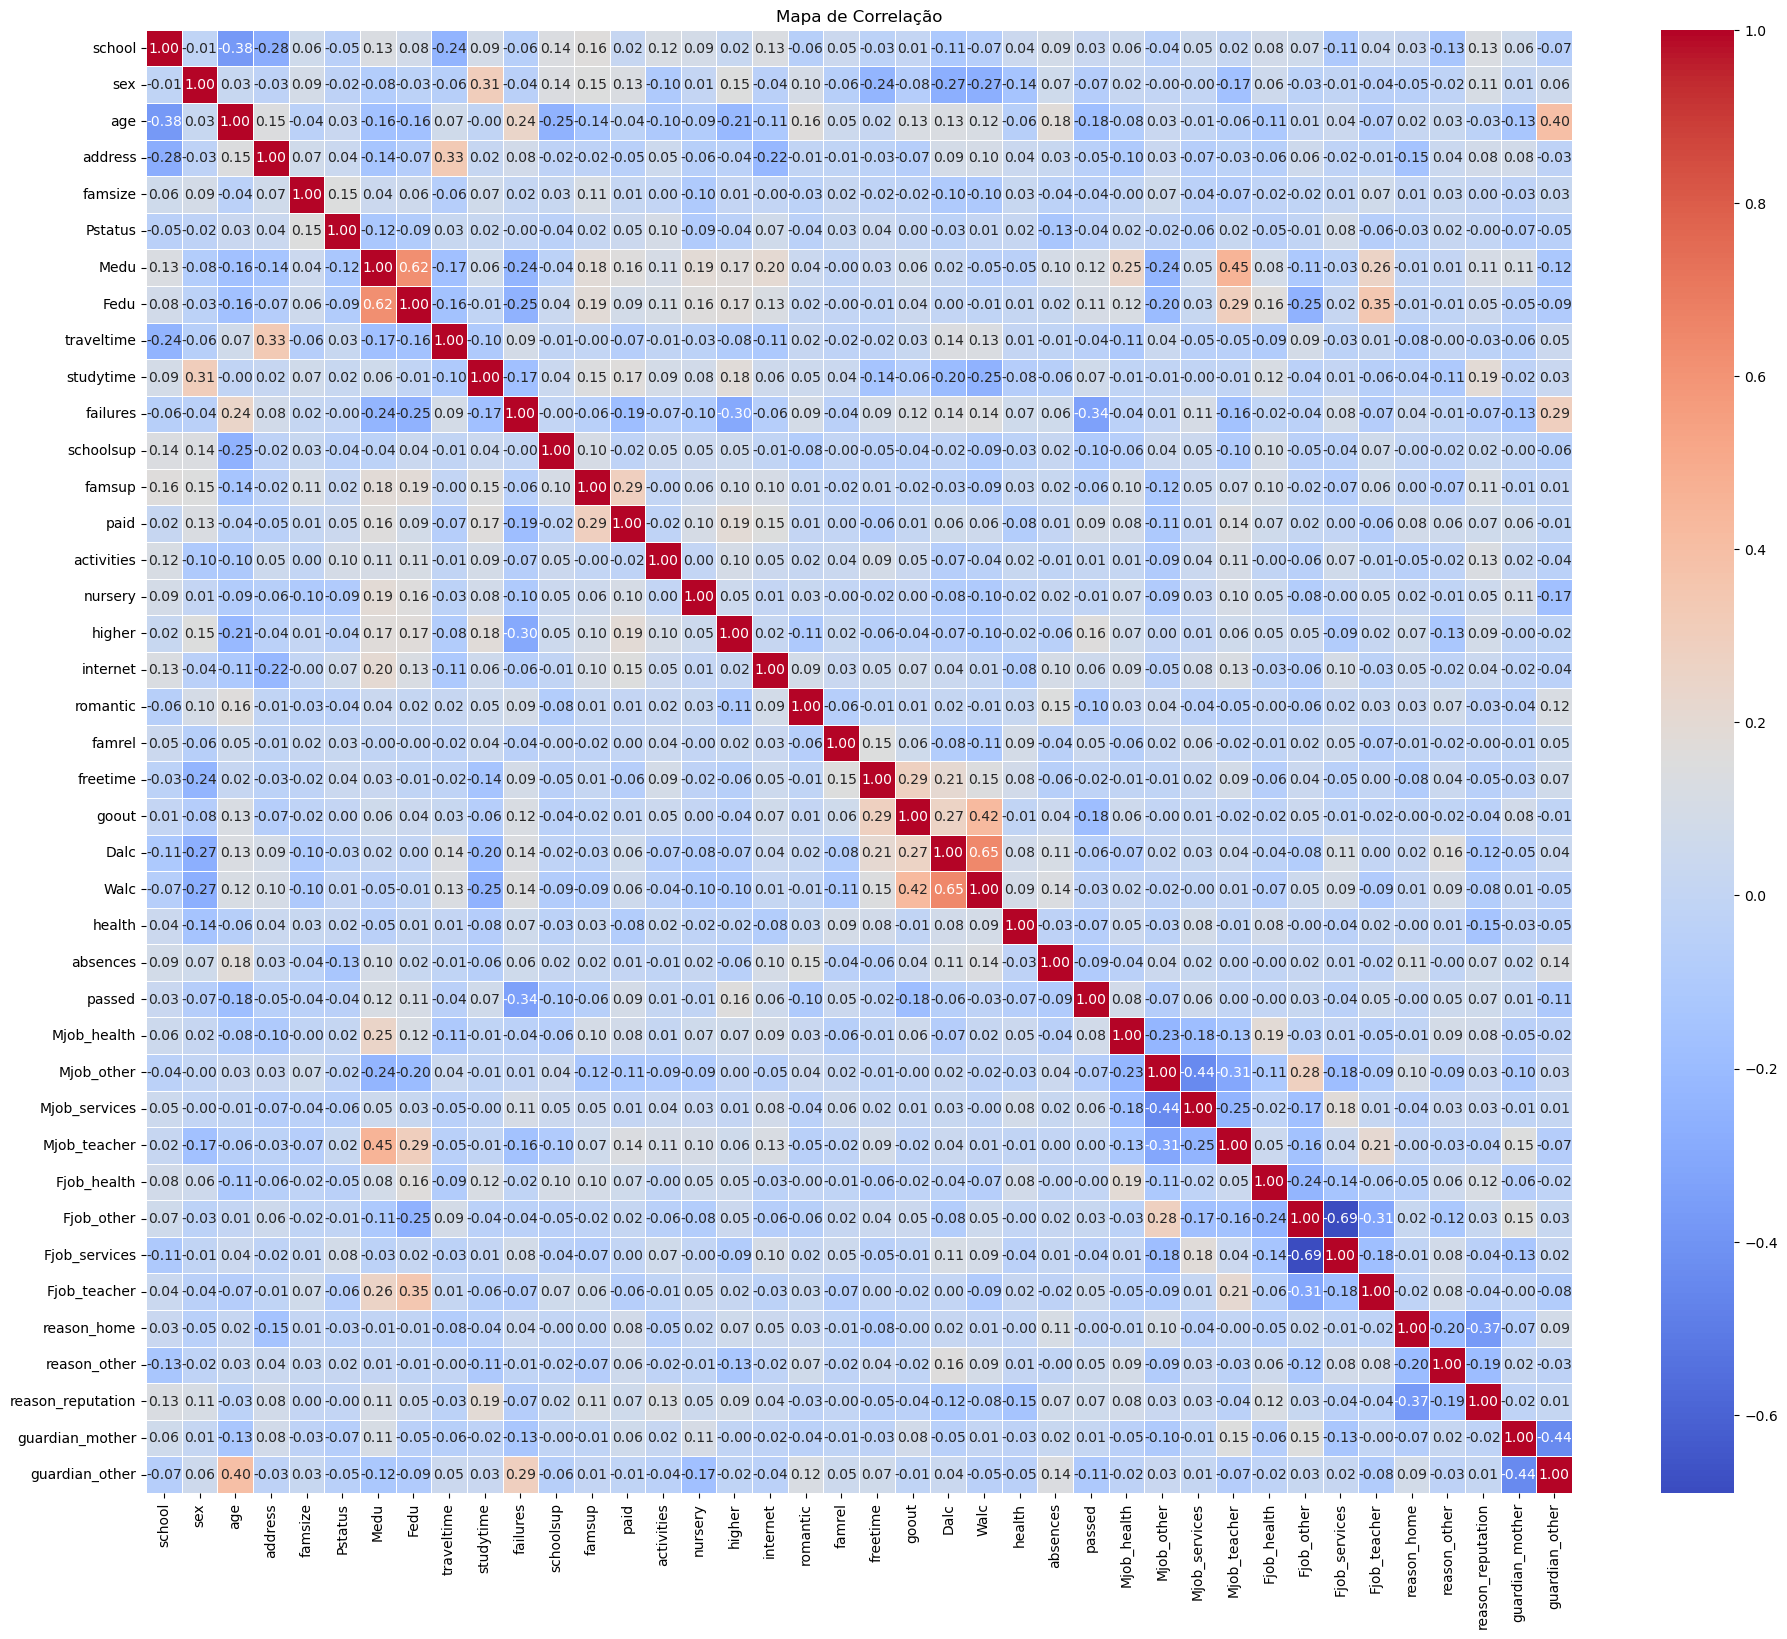

In [9]:
# Calcula a correlação entre as variáveis numéricas e a feature 'passed'
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Faz um mapa de calor para visualizar as correlações
plt.figure(figsize=(23, 19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

In [10]:
# Filtra as features que têm uma correlação maior que 0.1 com a variável 'passed'
correlated_features = correlation_matrix['passed'][correlation_matrix['passed'].abs() >= 0.1]
print(correlated_features)

age              -0.179645
Medu              0.115396
Fedu              0.108057
failures         -0.337731
higher            0.157708
goout            -0.183399
passed            1.000000
guardian_other   -0.107977
Name: passed, dtype: float64
